In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
df.drop('EmployeeCount', axis = 1, inplace = True)

In [5]:
df.set_index('EmployeeNumber', inplace = True)

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df1 = df.copy()
df1.drop('Attrition', axis = 1, inplace = True)
names_index1 = tuple(df1.columns)
names_index = list(names_index1)
names_index

['Age',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from urllib.request import urlopen

In [9]:
contact_df = df

In [17]:
dx = ['Yes', 'No']

In [18]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [19]:
df.Attrition.unique()

array([1, 0], dtype=int64)

In [20]:
def preprocessor(frame):
  res_df = frame.copy()
  le = preprocessing.LabelEncoder()

#   res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
  res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
  res_df['Department'] = le.fit_transform(res_df['Department'])
  res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
  res_df['Gender'] = le.fit_transform(res_df['Gender'])
  res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
  res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
  res_df['Over18'] = le.fit_transform(res_df['Over18'])
  res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
  return res_df

In [21]:
encoded_df = preprocessor(contact_df)
x = encoded_df.drop(['Attrition'], axis = 1).values
y = df['Attrition'].values

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [23]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [14]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [17, 18, 19],
              'bootstrap': [True],
              'max_features': ['auto'],
              'criterion': ['gini']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 2)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 18, 'max_features': 'auto'}
Time taken in grid search:  18.05


In [24]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 18)

RandomForestClassifier(max_depth=18, random_state=42)

# OOB Rate

In [16]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


KeyboardInterrupt: 

In [ ]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.043, color='#875FDB',linestyle='--')
plt.axhline(0.04, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [ ]:
print('OOB Error rate for 500 trees is: {0:.5f}'.format(oob_series[500]))

In [25]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=500,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=18, n_estimators=500, random_state=42)

# Train the Random Forest

In [26]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=18, n_estimators=500, random_state=42)

In [27]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [28]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [29]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [30]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'MonthlyIncome' has a Mean Decrease in Impurity of 0.07835
2. The feature 'Age' has a Mean Decrease in Impurity of 0.05796
3. The feature 'DailyRate' has a Mean Decrease in Impurity of 0.05598
4. The feature 'MonthlyRate' has a Mean Decrease in Impurity of 0.05199
5. The feature 'DistanceFromHome' has a Mean Decrease in Impurity of 0.05161
6. The feature 'OverTime' has a Mean Decrease in Impurity of 0.05150
7. The feature 'TotalWorkingYears' has a Mean Decrease in Impurity of 0.05004
8. The feature 'HourlyRate' has a Mean Decrease in Impurity of 0.04936
9. The feature 'YearsAtCompany' has a Mean Decrease in Impurity of 0.04350
10. The feature 'NumCompaniesWorked' has a Mean Decrease in Impurity of 0.03564
11. The feature 'PercentSalaryHike' has a Mean Decrease in Impurity of 0.03556
12. The feature 'YearsWithCurrManager' has a Mean Decrease in Impurity of 0.03496
13. The feature 'EnvironmentSatisfaction' has a Mean Decrease in Impurity of 0.03240
14. The

In [37]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(15, 15))

#     ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nHR Attrition')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

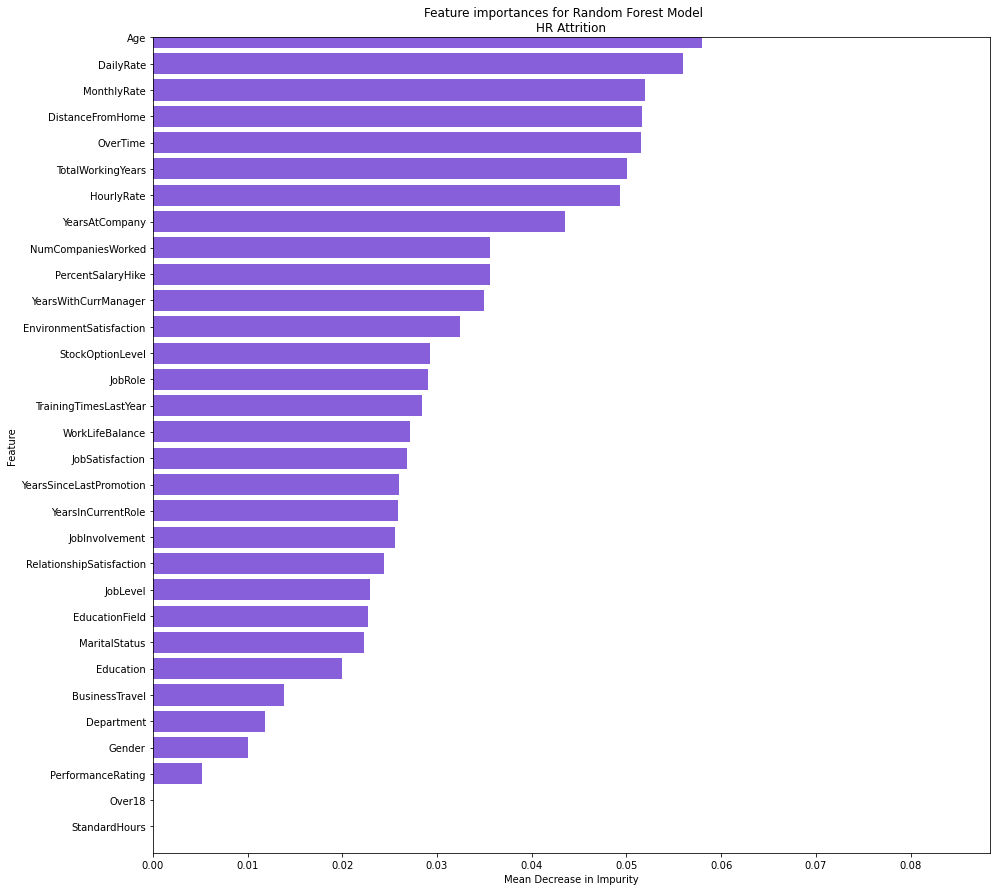

In [38]:
variable_importance_plot(importances_rf, indices_rf, names_index)

In [33]:
predictions_rf = fit_rf.predict(x_test)

In [34]:
accuracy_rf = fit_rf.score(x_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.952


In [35]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            x_test, 
            target_names = dx))

In [ ]:
# dx = y

In [36]:
class_report = print_class_report(predictions_rf, 'Random Forest')
class_report

Classification Report for Random Forest:


ValueError: Classification metrics can't handle a mix of binary and multiclass-multioutput targets

In [40]:
df.Age.describe()

count    2940.000000
mean       36.923810
std         9.133819
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [41]:
df.shape

(2940, 33)